# Problem Statement

Assessment Exercise:
In the dataset in the attached spreadsheet, you will find weekly values of different types. After properly cleaning the data, produce a report that shows month over month change. We are interested in your ability to uncover and discover any possible patterns, either long-term or short-term. You are free to use any tool of your choice, but you must document your process and demonstrate the steps you took to reach your results. The final report should be a PDF or powerpoint of no more than one (1) page that you will present to an ITE team member.

# Import Libraries

In [73]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('ggplot')
mpl.rcParams.update({'font.size': 10})


<Figure size 432x288 with 0 Axes>

# EDA

In [2]:
df = pd.read_csv('ITE_Data Assessment_Dataset 1.csv')
print(df.shape)
df


(6549, 3)


,date,variable,value
0,1998-09-26 00:00:00,type3,10.0
1,2007-05-05 00:00:00,type2,10.0
2,1987-08-08 00:00:00,type2,11.0
3,1983-08-13 00:00:00,type2,7.0
4,2015-10-03 00:00:00,type3,7.0
5,2009-06-27 00:00:00,type3,10.0
6,1988-12-03 00:00:00,type1,7.0
7,1995-06-03 00:00:00,type1,10.0
8,1979-01-06 00:00:00,type3,10.0
9,2006-01-21 00:00:00,type3,6.0


In [3]:
df.describe()


,value
count,6456.000000
mean,9.458333
std,2.044160
min,3.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,17.000000


In [4]:
df.dtypes


date         object
variable     object
value       float64
dtype: object

In [5]:
df.isna().groupby(df.variable).sum()


,date,variable,value
variable,,,
type1,0.0,0.0,31.0
type2,0.0,0.0,31.0
type3,0.0,0.0,31.0


In [6]:
nulls_df = df[df.isnull().any(axis=1)]
print(nulls_df.shape)
nulls_df


(93, 3)


,date,variable,value
54,2010-02-27 00:00:00,type3,NaN
75,2010-07-10 00:00:00,type3,NaN
113,2010-03-20 00:00:00,type3,NaN
162,2010-03-27 00:00:00,type3,NaN
422,2010-02-06 00:00:00,type3,NaN
491,2010-05-08 00:00:00,type3,NaN
625,2010-06-05 00:00:00,type3,NaN
631,2010-07-03 00:00:00,type1,NaN
666,2010-02-27 00:00:00,type2,NaN
700,2010-06-19 00:00:00,type1,NaN


In [7]:
nulls_df.variable.value_counts()


type3    31
type1    31
type2    31
Name: variable, dtype: int64

In [8]:
example_good_date = '2010-02-27 00:00:00'
bad_date_df = df[df.date.str.len() < len(example_good_date)]
print(bad_date_df.shape)
bad_date_df


(45, 3)


,date,variable,value
122,,type2,10.0
310,-,type3,9.0
429,-,type2,9.0
721,-,type2,10.0
933,-,type1,NaN
947,,type2,14.0
1161,,type1,11.0
1208,-,type2,7.0
1220,-,type3,7.0
1369,-,type1,10.0


In [9]:
bad_date_df.variable.value_counts()


type3    15
type2    15
type1    15
Name: variable, dtype: int64

# Data Manipulation

In [10]:
cleaned_df = df[df.date.str.len() == len(example_good_date)].dropna()
print(cleaned_df.shape)
cleaned_df


(6414, 3)


,date,variable,value
0,1998-09-26 00:00:00,type3,10.0
1,2007-05-05 00:00:00,type2,10.0
2,1987-08-08 00:00:00,type2,11.0
3,1983-08-13 00:00:00,type2,7.0
4,2015-10-03 00:00:00,type3,7.0
5,2009-06-27 00:00:00,type3,10.0
6,1988-12-03 00:00:00,type1,7.0
7,1995-06-03 00:00:00,type1,10.0
8,1979-01-06 00:00:00,type3,10.0
9,2006-01-21 00:00:00,type3,6.0


In [11]:
cleaned_df['date_time'] = cleaned_df.date.apply(lambda x: time.strptime(x, '%Y-%m-%d %H:%M:%S'))
cleaned_df['year'] = cleaned_df.date_time.apply(lambda x: f"{x.tm_year:04}").astype(int)
cleaned_df['month'] = cleaned_df.date_time.apply(lambda x: f"{x.tm_mon:02}")
cleaned_df['dt'] = (cleaned_df['year'].astype(str) + cleaned_df['month']).astype(int)
cleaned_df['day'] = cleaned_df.date_time.apply(lambda x: f"{x.tm_mday:02}")
cleaned_df['season'] = (cleaned_df['month'].astype(str) + cleaned_df['day']).astype(int)

seasons_dict = {**{i: 0 for i in range(321, 621)}, 
                **{i: 1 for i in range(621, 921)},
                **{i: 2 for i in range(921, 1221)},
                **{i: 3 for i in list(range(1221, 1232)) + list(range(101, 321))}}

cleaned_df = cleaned_df.replace({'season': seasons_dict})

cleaned_df['month'] = cleaned_df['month'].astype(int)
cleaned_df['quarter'] = (cleaned_df['month'] + 2) // 3

print(cleaned_df.shape)
cleaned_df


(6414, 10)


,date,variable,value,date_time,year,month,dt,day,season,quarter
0,1998-09-26 00:00:00,type3,10.0,"(1998, 9, 26, 0, 0, 0, 5, 269, -1)",1998,9,199809,26,2,3
1,2007-05-05 00:00:00,type2,10.0,"(2007, 5, 5, 0, 0, 0, 5, 125, -1)",2007,5,200705,05,0,2
2,1987-08-08 00:00:00,type2,11.0,"(1987, 8, 8, 0, 0, 0, 5, 220, -1)",1987,8,198708,08,1,3
3,1983-08-13 00:00:00,type2,7.0,"(1983, 8, 13, 0, 0, 0, 5, 225, -1)",1983,8,198308,13,1,3
4,2015-10-03 00:00:00,type3,7.0,"(2015, 10, 3, 0, 0, 0, 5, 276, -1)",2015,10,201510,03,2,4
5,2009-06-27 00:00:00,type3,10.0,"(2009, 6, 27, 0, 0, 0, 5, 178, -1)",2009,6,200906,27,1,2
6,1988-12-03 00:00:00,type1,7.0,"(1988, 12, 3, 0, 0, 0, 5, 338, -1)",1988,12,198812,03,2,4
7,1995-06-03 00:00:00,type1,10.0,"(1995, 6, 3, 0, 0, 0, 5, 154, -1)",1995,6,199506,03,0,2
8,1979-01-06 00:00:00,type3,10.0,"(1979, 1, 6, 0, 0, 0, 5, 6, -1)",1979,1,197901,06,3,1
9,2006-01-21 00:00:00,type3,6.0,"(2006, 1, 21, 0, 0, 0, 5, 21, -1)",2006,1,200601,21,3,1


In [12]:
cleaned_df.groupby('variable').agg({'dt': [min, max, np.mean]})


dt                       
             min     max           mean
variable                               
type1     197803  202001  199854.294668
type2     197803  202001  199854.294668
type3     197803  202001  199854.294668

In [13]:
agged_df = cleaned_df.groupby(['variable', 'dt']).agg([len, min, np.mean, max]).sort_index()
agged_df['change'] = agged_df[('value', 'mean')] - agged_df[('value', 'mean')].shift(1)
print(agged_df.shape)
agged_df


(1488, 21)


value                    year                   month      \
                  len   min   mean   max  len   min  mean   max   len min   
variable dt                                                                 
type1    197803   2.0   8.0   9.00  10.0    2  1978  1978  1978     2   3   
         197804   5.0   6.0   8.80  10.0    5  1978  1978  1978     5   4   
         197805   4.0   8.0   8.75  10.0    4  1978  1978  1978     4   5   
         197806   4.0   8.0  10.25  12.0    4  1978  1978  1978     4   6   
         197807   5.0   7.0   9.40  12.0    5  1978  1978  1978     5   7   
         197808   4.0   7.0   9.00  10.0    4  1978  1978  1978     4   8   
         197809   5.0   7.0  10.40  13.0    5  1978  1978  1978     5   9   
         197810   4.0   8.0   9.50  12.0    4  1978  1978  1978     4  10   
         197811   4.0   7.0   9.50  12.0    4  1978  1978  1978     4  11   
         197812   5.0   8.0   9.40  11.0    5  1978  1978  1978     5  12   
         197901   4.0   7.0  10.25  15.0    4  1979  1979  1979     4   1   
         197902   4.0   9.0  10.50  12.0    4  1979  1979  1979     4   2   
         197903   5.0   7.0   9.40  12.0    5  1979  1979  1979     5   3   
         197904   4.0  10.0  11.50  13.0    4  1979  1979  1979     4   4   
         197905   4.0   7.0   8.50  10.0    4  1979  1979  1979     4   5   
         197906   4.0   7.0   8.50   9.0    4  1979  1979  1979     4   6   
         197907   4.0   7.0   9.75  12.0    4  1979  1979  1979     4   7   
         197908   4.0   8.0  10.00  12.0    4  1979  1979  1979     4   8   
         197909   5.0   6.0   9.00  12.0    5  1979  1979  1979     5   9   
         197910   4.0   7.0   9.00  12.0    4  1979  1979  1979     4  10   
         197911   4.0   8.0   9.75  13.0    4  1979  1979  1979     4  11   
         197912   5.0   6.0   8.40  10.0    5  1979  1979  1979     5  12   
         198001   4.0   7.0   9.50  11.0    4  1980  1980  1980     4   1   
         198002   4.0   7.0   8.25  10.0    4  1980  1980  1980     4   2   
         198003   5.0   5.0   8.40  11.0    5  1980  1980  1980     5   3   
         198004   4.0   9.0  10.00  11.0    4  1980  1980  1980     4   4   
         198005   5.0   6.0   8.60  11.0    5  1980  1980  1980     5   5   
         198006   4.0   7.0   8.00   9.0    4  1980  1980  1980     4   6   
         198007   4.0   6.0   9.25  12.0    4  1980  1980  1980     4   7   
         198008   5.0   8.0   9.20  11.0    5  1980  1980  1980     5   8   
...               ...   ...    ...   ...  ...   ...   ...   ...   ...  ..   
type3    201708   4.0   9.0   9.50  10.0    4  2017  2017  2017     4   8   
         201709   5.0   7.0  10.40  14.0    5  2017  2017  2017     5   9   
         201710   4.0   5.0   7.25   9.0    4  2017  2017  2017     4  10   
         201711   4.0   9.0   9.75  10.0    4  2017  2017  2017     4  11   
         201712   5.0   6.0   8.60  12.0    5  2017  2017  2017     5  12   
         201801   4.0   7.0  11.25  14.0    4  2018  2018  2018     4   1   
         201802   4.0   8.0   9.25  11.0    4  2018  2018  2018     4   2   
         201803   5.0   8.0   9.60  10.0    5  2018  2018  2018     5   3   
         201804   4.0   7.0  10.00  12.0    4  2018  2018  2018     4   4   
         201805   4.0   9.0  10.00  11.0    4  2018  2018  2018     4   5   
         201806   5.0   8.0   9.80  13.0    5  2018  2018  2018     5   6   
         201807   4.0   7.0   7.75   9.0    4  2018  2018  2018     4   7   
         201808   4.0   8.0   9.75  11.0    4  2018  2018  2018     4   8   
         201809   5.0   8.0   9.40  11.0    5  2018  2018  2018     5   9   
         201810   4.0   8.0   9.50  12.0    4  2018  2018  2018     4  10   
         201811   4.0   7.0   8.75  11.0    4  2018  2018  2018     4  11   
         201812   5.0   8.0   9.60  12.0    5  2018  2018  2018     5  12   
         201901   4.0   7.0   9.25  11.0    4  2019  2019  2019     4   1   
         201

In [14]:
agged_df.describe()


value                                                year  \
               len          min         mean          max          len   
count  1488.000000  1488.000000  1488.000000  1488.000000  1488.000000   
mean      4.310484     7.294355     9.458524    11.624328     4.310484   
std       0.508539     1.405406     1.002483     1.441763     0.508539   
min       2.000000     3.000000     6.000000     6.000000     2.000000   
25%       4.000000     6.000000     8.750000    11.000000     4.000000   
50%       4.000000     7.000000     9.500000    12.000000     4.000000   
75%       5.000000     8.000000    10.200000    13.000000     5.000000   
max       5.000000    11.000000    12.500000    17.000000     5.000000   

                                                 month               ...  \
              min        mean         max          len          min  ...   
count  1488.00000  1488.00000  1488.00000  1488.000000  1488.000000  ...   
mean   1998.46371  1998.46371  1998.46371     4.310484     6.544355  ...   
std      12.11423    12.11423    12.11423     0.508539     3.453902  ...   
min    1978.00000  1978.00000  1978.00000     2.000000     1.000000  ...   
25%    1988.00000  1988.00000  1988.00000     4.000000     4.000000  ...   
50%    1998.00000  1998.00000  1998.00000     4.000000     7.000000  ...   
75%    2009.00000  2009.00000  2009.00000     5.000000    10.000000  ...   
max    2020.00000  2020.00000  2020.00000     5.000000    12.000000  ...   

                         season                                         \
               max          len          min         mean          max   
count  1488.000000  1488.000000  1488.000000  1488.000000  1488.000000   
mean      6.544355     4.310484     1.250000     1.491633     1.750000   
std       3.453902     0.508539     1.084525     1.011356     1.086383   
min       1.000000     2.000000     0.000000     0.000000     0.000000   
25%       4.000000     4.000000     0.000000     1.000000     1.000000   
50%       7.000000     4.000000     1.000000     1.500000     2.000000   
75%      10.000000     5.000000     2.000000     2.250000     3.000000   
max      12.000000     5.000000     3.000000     3.000000     3.000000   

           quarter                                              change  
               len          min         mean          max               
count  1488.000000  1488.000000  1488.000000  1488.000000  1487.000000  
mean      4.310484     2.514113     2.514113     2.514113     0.000336  
std       0.508539     1.118321     1.118321     1.118321     1.415091  
min       2.000000     1.000000     1.000000     1.000000    -4.750000  
25%       4.000000     2.000000     2.000000     2.000000    -1.000000  
50%       4.000000     3.000000     3.000000     3.000000     0.000000  
75%       5.000000     4.000000     4.000000     4.000000     1.000000  
max       5.000000     4.000000     4.000000     4.000000     4.250000  

[8 rows x 21 columns]

In [15]:
agged_df.groupby('variable').describe()


value                                                                \
            len                                                 min             
          count      mean       std  min  25%  50%  75%  max  count      mean   
variable                                                                        
type1     496.0  4.310484  0.508882  2.0  4.0  4.0  5.0  5.0  496.0  7.304435   
type2     496.0  4.310484  0.508882  2.0  4.0  4.0  5.0  5.0  496.0  7.181452   
type3     496.0  4.310484  0.508882  2.0  4.0  4.0  5.0  5.0  496.0  7.397177   

          ... quarter      change                                            \
          ...     max                                                         
          ...     75%  max  count      mean       std   min  25%  50%   75%   
variable  ...                                                                 
type1     ...     4.0  4.0  495.0 -0.006061  1.397811 -3.75 -1.0  0.0  0.95   
type2     ...     4.0  4.0  496.0  0.005040  1.322001 -3.70 -0.9  0.0  1.00   
type3     ...     4.0  4.0  496.0  0.002016  1.521122 -4.75 -1.0  0.0  1.10   

                
                
           max  
variable        
type1     4.25  
type2     4.00  
type3     4.05  

[3 rows x 168 columns]

In [16]:
agged_df_by_month = cleaned_df.groupby(['variable', 'month']).agg([len, min, np.mean, max]).sort_index()
print(agged_df_by_month.shape)
agged_df_by_month


(36, 20)


value                      year                            dt  \
                  len  min      mean   max  len   min         mean   max  len   
variable month                                                                  
type1    1      177.0  3.0  9.254237  16.0  177  1979  1998.875706  2020  177   
         2      159.0  3.0  9.591195  16.0  159  1979  1998.622642  2019  159   
         3      177.0  5.0  9.491525  14.0  177  1978  1998.774011  2019  177   
         4      176.0  5.0  9.670455  15.0  176  1978  1998.238636  2019  176   
         5      180.0  5.0  9.383333  17.0  180  1978  1998.088889  2019  180   
         6      175.0  4.0  9.434286  16.0  175  1978  1998.394286  2019  175   
         7      180.0  3.0  9.244444  14.0  180  1978  1998.155556  2019  180   
         8      184.0  5.0  9.445652  15.0  184  1978  1998.478261  2019  184   
         9      181.0  4.0  9.187845  15.0  181  1978  1998.475138  2019  181   
         10     184.0  4.0  9.500000  15.0  184  1978  1998.483696  2019  184   
         11     179.0  4.0  9.664804  14.0  179  1978  1998.592179  2019  179   
         12     186.0  3.0  9.370968  16.0  186  1978  1998.564516  2019  186   
type2    1      177.0  4.0  9.418079  14.0  177  1979  1998.875706  2020  177   
         2      159.0  4.0  9.364780  15.0  159  1979  1998.622642  2019  159   
         3      177.0  4.0  9.429379  17.0  177  1978  1998.774011  2019  177   
         4      176.0  5.0  9.386364  14.0  176  1978  1998.238636  2019  176   
         5      180.0  4.0  9.311111  15.0  180  1978  1998.088889  2019  180   
         6      175.0  5.0  9.457143  15.0  175  1978  1998.394286  2019  175   
         7      180.0  3.0  9.411111  14.0  180  1978  1998.155556  2019  180   
         8      184.0  4.0  9.282609  15.0  184  1978  1998.478261  2019  184   
         9      181.0  5.0  9.541436  16.0  181  1978  1998.475138  2019  181   
         10     184.0  4.0  9.396739  14.0  184  1978  1998.483696  2019  184   
         11     179.0  5.0  9.268156  15.0  179  1978  1998.592179  2019  179   
         12     186.0  3.0  9.387097  14.0  186  1978  1998.564516  2019  186   
type3    1      177.0  4.0  9.485876  15.0  177  1979  1998.875706  2020  177   
         2      159.0  4.0  9.509434  16.0  159  1979  1998.622642  2019  159   
         3      177.0  3.0  9.395480  15.0  177  1978  1998.774011  2019  177   
         4      176.0  5.0  9.602273  15.0  176  1978  1998.238636  2019  176   
         5      180.0  5.0  9.555556  14.0  180  1978  1998.088889  2019  180   
         6      175.0  4.0  9.571429  14.0  175  1978  1998.394286  2019  175   
         7      180.0  3.0  9.550000  15.0  180  1978  1998.155556  2019  180   
         8      184.0  5.0  9.483696  14.0  184  1978  1998.478261  2019  184   
         9      181.0  5.0  9.674033  14.0  181  1978  1998.475138  2019  181   
         10     184.0  5.0  9.597826  15.0  184  1978  1998.483696  2019  184   
         11     179.0  5.0  9.670391  14.0  179  1978  1998.592179  2019  179   
         12     186.0  5.0  9.586022  16.0  186  1978  1998.564516  2019  186   

                                              season                    \
                   min           mean     max    len min      mean max   
variable month                                                           
type1    1      197901  199888.570621  202001    177   3  3.000000   3   
         2      197902  199864.264151  201902    159   3  3.000000   3   
         3      197803  199880.401130  201903    177   0  1.881356   3   
         4      197804  199827.863636  201904    176   0  0.000000   0   
         5      197805  199813.888889  201905    180   0  0.000000   0   
         6      197806  199845.428571  201906    175   0  0.337143   1   
         7      197807  199822.555556  201907    180   1  1.000000   1   
         8      197808  199855.826087  201908    184   1  1.000000   1   
         9      197809  199856.513812  201

In [17]:
agged_df_by_month.describe()


value                                         year               \
              len        min       mean        max         len          min   
count   36.000000  36.000000  36.000000  36.000000   36.000000    36.000000   
mean   178.166667   4.194444   9.460410  14.944444  178.166667  1978.166667   
std      6.737952   0.786291   0.130080   0.892651    6.737952     0.377964   
min    159.000000   3.000000   9.187845  14.000000  159.000000  1978.000000   
25%    176.750000   4.000000   9.385606  14.000000  176.750000  1978.000000   
50%    179.500000   4.000000   9.451398  15.000000  179.500000  1978.000000   
75%    181.750000   5.000000   9.559524  15.250000  181.750000  1978.000000   
max    186.000000   5.000000   9.674033  17.000000  186.000000  1979.000000   

                                         dt                                \
              mean          max         len            min           mean   
count    36.000000    36.000000   36.000000      36.000000      36.000000   
mean   1998.478626  2019.083333  178.166667  197823.166667  199854.362626   
std       0.228089     0.280306    6.737952      35.628640      22.394077   
min    1998.088889  2019.000000  159.000000  197803.000000  199813.888889   
25%    1998.355373  2019.000000  176.750000  197805.750000  199841.037338   
50%    1998.480978  2019.000000  179.500000  197808.500000  199857.441689   
75%    1998.599794  2019.000000  181.750000  197811.250000  199868.893179   
max    1998.875706  2020.000000  186.000000  197902.000000  199888.570621   

                          season                                      quarter  \
                 max         len        min       mean        max         len   
count      36.000000   36.000000  36.000000  36.000000  36.000000   36.000000   
mean   201914.833333  178.166667   1.250000   1.492978   1.750000  178.166667   
std        26.527075    6.737952   1.105183   1.025264   1.105183    6.737952   
min    201902.000000  159.000000   0.000000   0.000000   0.000000  159.000000   
25%    201904.750000  176.750000   0.000000   0.834286   1.000000  176.750000   
50%    201907.500000  179.500000   1.000000   1.609186   2.000000  179.500000   
75%    201910.250000  181.750000   2.000000   2.090054   3.000000  181.750000   
max    202001.000000  186.000000   3.000000   3.000000   3.000000  186.000000   

                                        
             min       mean        max  
count  36.000000  36.000000  36.000000  
mean    2.500000   2.500000   2.500000  
std     1.133893   1.133893   1.133893  
min     1.000000   1.000000   1.000000  
25%     1.750000   1.750000   1.750000  
50%     2.500000   2.500000   2.500000  
75%     3.250000   3.250000   3.250000  
max     4.000000   4.000000   4.000000

In [18]:
agged_df_by_quarter = cleaned_df.groupby(['variable', 'quarter']).agg([len, min, np.mean, max]).sort_index()
print(agged_df_by_quarter.shape)
agged_df_by_quarter


(12, 20)


value                      year                           \
                    len  min      mean   max  len   min         mean   max   
variable quarter                                                             
type1    1        513.0  3.0  9.440546  16.0  513  1978  1998.762183  2020   
         2        531.0  4.0  9.495292  17.0  531  1978  1998.239171  2019   
         3        545.0  3.0  9.293578  15.0  545  1978  1998.370642  2019   
         4        549.0  3.0  9.510018  16.0  549  1978  1998.546448  2019   
type2    1        513.0  4.0  9.405458  17.0  513  1978  1998.762183  2020   
         2        531.0  4.0  9.384181  15.0  531  1978  1998.239171  2019   
         3        545.0  3.0  9.411009  16.0  545  1978  1998.370642  2019   
         4        549.0  3.0  9.351548  15.0  549  1978  1998.546448  2019   
type3    1        513.0  3.0  9.461988  16.0  513  1978  1998.762183  2020   
         2        531.0  4.0  9.576271  15.0  531  1978  1998.239171  2019   
         3        545.0  3.0  9.568807  15.0  545  1978  1998.370642  2019   
         4        549.0  5.0  9.617486  16.0  549  1978  1998.546448  2019   

                 month                      dt                                 \
                   len min       mean max  len     min           mean     max   
variable quarter                                                                
type1    1         513   1   2.000000   3  513  197803  199878.218324  202001   
         2         531   4   4.998117   6  531  197804  199828.915254  201906   
         3         545   7   8.001835   9  545  197807  199845.066055  201909   
         4         549  10  11.003643  12  549  197810  199865.648452  201912   
type2    1         513   1   2.000000   3  513  197803  199878.218324  202001   
         2         531   4   4.998117   6  531  197804  199828.915254  201906   
         3         545   7   8.001835   9  545  197807  199845.066055  201909   
         4         549  10  11.003643  12  549  197810  199865.648452  201912   
type3    1         513   1   2.000000   3  513  197803  199878.218324  202001   
         2         531   4   4.998117   6  531  197804  199828.915254  201906   
         3         545   7   8.001835   9  545  197807  199845.066055  201909   
         4         549  10  11.003643  12  549  197810  199865.648452  201912   

                 season                    
                    len min      mean max  
variable quarter                           
type1    1          513   0  2.614035   3  
         2          531   0  0.111111   1  
         3          545   1  1.111927   2  
         4          549   2  2.122040   3  
type2    1          513   0  2.614035   3  
         2          531   0  0.111111   1  
         3          545   1  1.111927   2  
         4          549   2  2.122040   3  
type3    1          513   0  2.614035   3  
         2          531   0  0.111111   1  
         3          545   1  1.111927   2  
         4          549   2  2.122040   3

In [19]:
agged_df_by_quarter.describe()


value                                       year          \
              len      min       mean        max         len     min   
count   12.000000  12.0000  12.000000  12.000000   12.000000    12.0   
mean   534.500000   3.5000   9.459682  15.750000  534.500000  1978.0   
std     14.724747   0.6742   0.097640   0.753778   14.724747     0.0   
min    513.000000   3.0000   9.293578  15.000000  513.000000  1978.0   
25%    526.500000   3.0000   9.400139  15.000000  526.500000  1978.0   
50%    538.000000   3.0000   9.451267  16.000000  538.000000  1978.0   
75%    546.000000   4.0000   9.524715  16.000000  546.000000  1978.0   
max    549.000000   5.0000   9.617486  17.000000  549.000000  1978.0   

                                      month                                   \
              mean          max         len        min       mean        max   
count    12.000000    12.000000   12.000000  12.000000  12.000000  12.000000   
mean   1998.479611  2019.250000  534.500000   5.500000   6.500899   7.500000   
std       0.204939     0.452267   14.724747   3.503245   3.504956   3.503245   
min    1998.239171  2019.000000  513.000000   1.000000   2.000000   3.000000   
25%    1998.337774  2019.000000  526.500000   3.250000   4.248588   5.250000   
50%    1998.458545  2019.000000  538.000000   5.500000   6.499976   7.500000   
75%    1998.600382  2019.250000  546.000000   7.750000   8.752287   9.750000   
max    1998.762183  2020.000000  549.000000  10.000000  11.003643  12.000000   

               dt                                                   season  \
              len            min           mean            max         len   
count   12.000000      12.000000      12.000000      12.000000   12.000000   
mean   534.500000  197806.000000  199854.462021  201932.000000  534.500000   
std     14.724747       2.860388      19.751315      41.667515   14.724747   
min    513.000000  197803.000000  199828.915254  201906.000000  513.000000   
25%    526.500000  197803.750000  199841.028355  201908.250000  526.500000   
50%    538.000000  197805.500000  199855.357253  201910.500000  538.000000   
75%    546.000000  197807.750000  199868.790920  201934.250000  546.000000   
max    549.000000  197810.000000  199878.218324  202001.000000  549.000000   

                                        
             min       mean        max  
count  12.000000  12.000000  12.000000  
mean    0.750000   1.489778   2.250000  
std     0.866025   1.005513   0.866025  
min     0.000000   0.111111   1.000000  
25%     0.000000   0.861723   1.750000  
50%     0.500000   1.616983   2.500000  
75%     1.250000   2.245039   3.000000  
max     2.000000   2.614035   3.000000

In [20]:
agged_df_by_season = cleaned_df.groupby(['variable', 'season']).agg([len, min, np.mean, max]).sort_index()
print(agged_df_by_season.shape)
agged_df_by_season


(12, 20)


value                      year                           \
                   len  min      mean   max  len   min         mean   max   
variable season                                                             
type1    0       538.0  4.0  9.550186  17.0  538  1978  1998.189591  2019   
         1       543.0  3.0  9.292818  15.0  543  1978  1998.390424  2019   
         2       543.0  4.0  9.517495  16.0  543  1978  1998.535912  2019   
         3       514.0  3.0  9.375486  16.0  514  1978  1998.807393  2020   
type2    0       538.0  4.0  9.384758  15.0  538  1978  1998.189591  2019   
         1       543.0  3.0  9.379374  15.0  543  1978  1998.390424  2019   
         2       543.0  3.0  9.390424  16.0  543  1978  1998.535912  2019   
         3       514.0  4.0  9.396887  17.0  514  1978  1998.807393  2020   
type3    0       538.0  4.0  9.585502  15.0  538  1978  1998.189591  2019   
         1       543.0  3.0  9.534070  15.0  543  1978  1998.390424  2019   
         2       543.0  5.0  9.605893  16.0  543  1978  1998.535912  2019   
         3       514.0  3.0  9.501946  16.0  514  1978  1998.807393  2020   

                month                      dt                                 \
                  len min       mean max  len     min           mean     max   
variable season                                                                
type1    0        538   3   4.643123   6  538  197803  199823.602230  201906   
         1        543   6   7.672192   9  543  197806  199846.714549  201909   
         2        543   9  10.655617  12  543  197809  199864.246777  201912   
         3        514   1   3.175097  12  514  197803  199883.914397  202001   
type2    0        538   3   4.643123   6  538  197803  199823.602230  201906   
         1        543   6   7.672192   9  543  197806  199846.714549  201909   
         2        543   9  10.655617  12  543  197809  199864.246777  201912   
         3        514   1   3.175097  12  514  197803  199883.914397  202001   
type3    0        538   3   4.643123   6  538  197803  199823.602230  201906   
         1        543   6   7.672192   9  543  197806  199846.714549  201909   
         2        543   9  10.655617  12  543  197809  199864.246777  201912   
         3        514   1   3.175097  12  514  197803  199883.914397  202001   

                quarter                    
                    len min      mean max  
variable season                            
type1    0          538   1  1.877323   2  
         1          543   2  2.891344   3  
         2          543   3  3.887661   4  
         3          514   1  1.391051   4  
type2    0          538   1  1.877323   2  
         1          543   2  2.891344   3  
         2          543   3  3.887661   4  
         3          514   1  1.391051   4  
type3    0          538   1  1.877323   2  
         1          543   2  2.891344   3  
         2          543   3  3.887661   4  
         3          514   1  1.391051   4

In [21]:
agged_df_by_season


value                      year                           \
                   len  min      mean   max  len   min         mean   max   
variable season                                                             
type1    0       538.0  4.0  9.550186  17.0  538  1978  1998.189591  2019   
         1       543.0  3.0  9.292818  15.0  543  1978  1998.390424  2019   
         2       543.0  4.0  9.517495  16.0  543  1978  1998.535912  2019   
         3       514.0  3.0  9.375486  16.0  514  1978  1998.807393  2020   
type2    0       538.0  4.0  9.384758  15.0  538  1978  1998.189591  2019   
         1       543.0  3.0  9.379374  15.0  543  1978  1998.390424  2019   
         2       543.0  3.0  9.390424  16.0  543  1978  1998.535912  2019   
         3       514.0  4.0  9.396887  17.0  514  1978  1998.807393  2020   
type3    0       538.0  4.0  9.585502  15.0  538  1978  1998.189591  2019   
         1       543.0  3.0  9.534070  15.0  543  1978  1998.390424  2019   
         2       543.0  5.0  9.605893  16.0  543  1978  1998.535912  2019   
         3       514.0  3.0  9.501946  16.0  514  1978  1998.807393  2020   

                month                      dt                                 \
                  len min       mean max  len     min           mean     max   
variable season                                                                
type1    0        538   3   4.643123   6  538  197803  199823.602230  201906   
         1        543   6   7.672192   9  543  197806  199846.714549  201909   
         2        543   9  10.655617  12  543  197809  199864.246777  201912   
         3        514   1   3.175097  12  514  197803  199883.914397  202001   
type2    0        538   3   4.643123   6  538  197803  199823.602230  201906   
         1        543   6   7.672192   9  543  197806  199846.714549  201909   
         2        543   9  10.655617  12  543  197809  199864.246777  201912   
         3        514   1   3.175097  12  514  197803  199883.914397  202001   
type3    0        538   3   4.643123   6  538  197803  199823.602230  201906   
         1        543   6   7.672192   9  543  197806  199846.714549  201909   
         2        543   9  10.655617  12  543  197809  199864.246777  201912   
         3        514   1   3.175097  12  514  197803  199883.914397  202001   

                quarter                    
                    len min      mean max  
variable season                            
type1    0          538   1  1.877323   2  
         1          543   2  2.891344   3  
         2          543   3  3.887661   4  
         3          514   1  1.391051   4  
type2    0          538   1  1.877323   2  
         1          543   2  2.891344   3  
         2          543   3  3.887661   4  
         3          514   1  1.391051   4  
type3    0          538   1  1.877323   2  
         1          543   2  2.891344   3  
         2          543   3  3.887661   4  
         3          514   1  1.391051   4

# Plots

type1 df shape: (2138, 10)
type1 agged df shape: (496, 6)
type1 agged by month df shape: (12, 5)
type1 agged by quarter df shape: (4, 5)
type1 agged by season df shape: (4, 5)
type2 df shape: (2138, 10)
type2 agged df shape: (496, 6)
type2 agged by month df shape: (12, 5)
type2 agged by quarter df shape: (4, 5)
type2 agged by season df shape: (4, 5)
type3 df shape: (2138, 10)
type3 agged df shape: (496, 6)
type3 agged by month df shape: (12, 5)
type3 agged by quarter df shape: (4, 5)
type3 agged by season df shape: (4, 5)


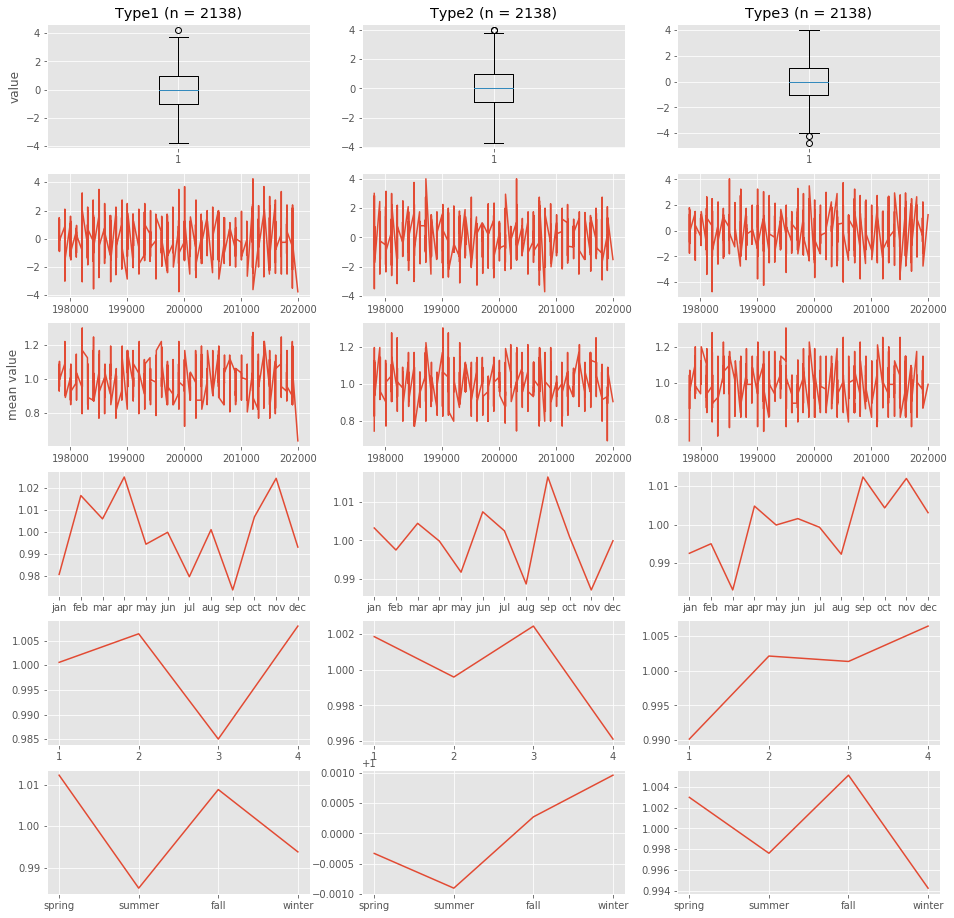

In [42]:
variables = ['type1', 'type2', 'type3']
seasons_dict2 = {0: 'spring', 1: 'summer', 2: 'fall', 3: 'winter'}

fig, ax = plt.subplots(6, 3, figsize=(16, 16))

for j, variable in enumerate(variables):
    var_df = cleaned_df[cleaned_df.variable == variable]
    print(f'{variable} df shape: {var_df.shape}')
    
    df_agged = var_df.groupby(['dt']).agg(np.mean).sort_index()
    df_agged['change'] = df_agged.value - df_agged.value.shift(1)
    print(f'{variable} agged df shape: {df_agged.shape}')
    
    ax[0, j].set_title(f'{variable.title()} (n = {var_df.shape[0]})')
    ax[0, j].boxplot(df_agged.change.dropna())
    
    df_agged_by_year = df_agged.groupby(['dt']).agg(np.mean).sort_index()
    ax[1, j].plot(df_agged_by_year.index, df_agged_by_year.change)

    ax[2, j].plot(df_agged.index, df_agged.value / np.mean(df_agged.value))
#     ax[2, j].hlines(1, np.min(list(df_agged.index)), np.max(list(df_agged.index)), colors = 'gray')

    df_agged_by_month = var_df.groupby(['month']).agg([np.mean]).sort_index()
    print(f'{variable} agged by month df shape: {df_agged_by_month.shape}')
    
    ax[3, j].plot(df_agged_by_month.index, df_agged_by_month.value / np.mean(df_agged_by_month.value))
    ax[3, j].set_xticks([i + 1 for i in range(12)])
    ax[3, j].set_xticklabels(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
    
    df_agged_by_quarter = var_df.groupby(['quarter']).agg([np.mean]).sort_index()
    print(f'{variable} agged by quarter df shape: {df_agged_by_quarter.shape}')
    
    ax[4, j].plot(df_agged_by_quarter.index, df_agged_by_quarter.value / np.mean(df_agged_by_quarter.value))
    ax[4, j].set_xticks([i + 1 for i in range(4)])
    ax[4, j].set_xticklabels([str(i + 1) for i in range(4)])
    
    df_agged_by_season = var_df.groupby(['season']).agg([np.mean]).sort_index()
    print(f'{variable} agged by season df shape: {df_agged_by_season.shape}')
    
    ax[5, j].plot(df_agged_by_season.index, df_agged_by_season.value / np.mean(df_agged_by_season.value))
    ax[5, j].set_xticks(range(len(df_agged_by_season.index)))        
    ax[5, j].set_xticklabels([seasons_dict2[i] for i in df_agged_by_season.index])    

ax[0, 0].set_ylabel('value')
ax[2, 0].set_ylabel('mean value')

# ax[0].set_xlabel('Year and month')
# ax[2, 1].set_xlabel('Month (aggregated over all years)')
# ax[2, 2].set_xlabel('Quarter (aggregated over all years)')

plt.show()    
    

type1 df shape: (2138, 10)
type1 agged by month df shape: (12, 5)
type2 df shape: (2138, 10)
type2 agged by month df shape: (12, 5)
type3 df shape: (2138, 10)
type3 agged by month df shape: (12, 5)


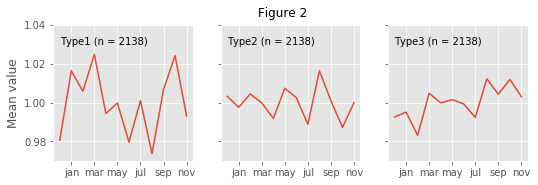

In [106]:
variables = ['type1', 'type2', 'type3']

fig, ax = plt.subplots(1, 3, figsize=(8.5, 2.5), sharey = True)

for j, variable in enumerate(variables):
    var_df = cleaned_df[cleaned_df.variable == variable]
    print(f'{variable} df shape: {var_df.shape}')
    
    ax[j].set_ylim([0.97, 1.04])
    ax[j].text(1, 1.03, f'{variable.title()} (n = {var_df.shape[0]})')

    df_agged_by_month = var_df.groupby(['month']).agg([np.mean]).sort_index()
    print(f'{variable} agged by month df shape: {df_agged_by_month.shape}')
    
    ax[j].plot(df_agged_by_month.index, df_agged_by_month.value / np.mean(df_agged_by_month.value))
    ax[j].set_xticks([i + 1 for i in range(12) if i % 2 == 1])
    ax[j].set_xticklabels(['jan', 'mar', 'may', 'jul', 'sep', 'nov'])
#     ax[j].set_xlabel('Month')
    
ax[0].set_ylabel('Mean value')
fig.suptitle('Figure 2')

# ax[0].set_xlabel('Year and month')
# ax[2, 1].set_xlabel('Month (aggregated over all years)')
# ax[2, 2].set_xlabel('Quarter (aggregated over all years)')

plt.savefig('subplot_figure.png')

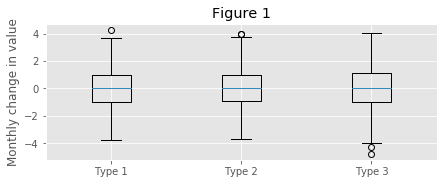

In [107]:
df_agged = cleaned_df.groupby(['variable', 'dt']).agg(np.mean).sort_index()
df_agged['change'] = df_agged.value - df_agged.value.shift(1)
    
plt.figure(figsize = (7, 2.5))
plt.ylabel('Monthly change in value')
# plt.xlabel('Variable')
plt.title('Figure 1')

plt.boxplot([df_agged[df_agged.index.get_level_values(0) == variable].change.dropna() for variable in variables])
plt.xticks([1, 2, 3], ['Type 1', 'Type 2', 'Type 3'])

plt.savefig('figure.png')